In [14]:
import numpy as np  # linear algebra
import pandas as pd  
import scipy.signal
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import butter, filtfilt, iirnotch

In [15]:
mat = scipy.io.loadmat("D:\CODING\Python New\src\EEG\sub-001_ses-01_task_motorimagery_eeg.mat")
print(mat.keys())

data = mat['data']
print(data.shape)


dict_keys(['__header__', '__version__', '__globals__', 'data', 'labels'])
(100, 32, 1000)


In [16]:
samples, channels, timesteps = data.shape
index = pd.MultiIndex.from_product(
    [range(samples), range(timesteps)],
    names=["sample", "time"]
)

# Reshape ke 2D dan buat DataFrame
df = pd.DataFrame(data.reshape(-1, channels), index=index)
df.head()

0          1          2          3          4          5   \
sample time                                                                     
0      0     11.784479  11.683339  11.722377  11.752732  11.195822  11.497853   
       1      9.681794   9.107265   8.848329   8.256310   7.176221   6.023234   
       2    -15.148633 -15.460169 -16.435061 -17.123466 -16.751219 -17.319876   
       3    -17.076033 -16.978395 -17.117580 -16.646008 -15.920123 -15.840104   
       4    -14.994312 -14.636619 -14.477701 -14.269122 -13.797550 -14.564856   

                    6          7          8          9   ...         22  \
sample time                                              ...              
0      0     11.887719  11.500222  11.282139  11.838482  ...  11.525969   
       1      5.007490   3.492057   0.173715  -1.803360  ... -12.962567   
       2    -17.663582 -18.071507 -18.871111 -18.776411  ... -19.679256   
       3    -15.824430 -16.223545 -15.994538 -15.712807  ... -14.482595   
       4    -14.937799 -14.857780 -14.345226 -14.142520  ... -12.690041   

                    23         24         25         26         27         28  \
sample time                                                                     
0      0     10.857987  10.867789  11.254719  11.089234  10.912132  10.679496   
       1    -13.861497 -14.403854 -14.586828 -14.483447 -14.806600 -15.033364   
       2    -19.946873 -19.580498 -18.907341 -18.546711 -18.761856 -19.035347   
       3    -14.794130 -14.939061 -14.972920 -15.521150 -15.213246 -14.198196   
       4    -13.036684 -12.492086 -12.087667 -12.109909 -11.559439 -11.120038   

                    29         30         31  
sample time                                   
0      0     10.934928  10.792807  10.384883  
       1    -15.143313 -15.162620 -15.480027  
       2    -18.476196 -17.984068 -17.521305  
       3    -14.413216 -14.853312 -14.752866  
       4    -10.478924  -9.767721  -9.299085  

[5 rows x 32 columns]

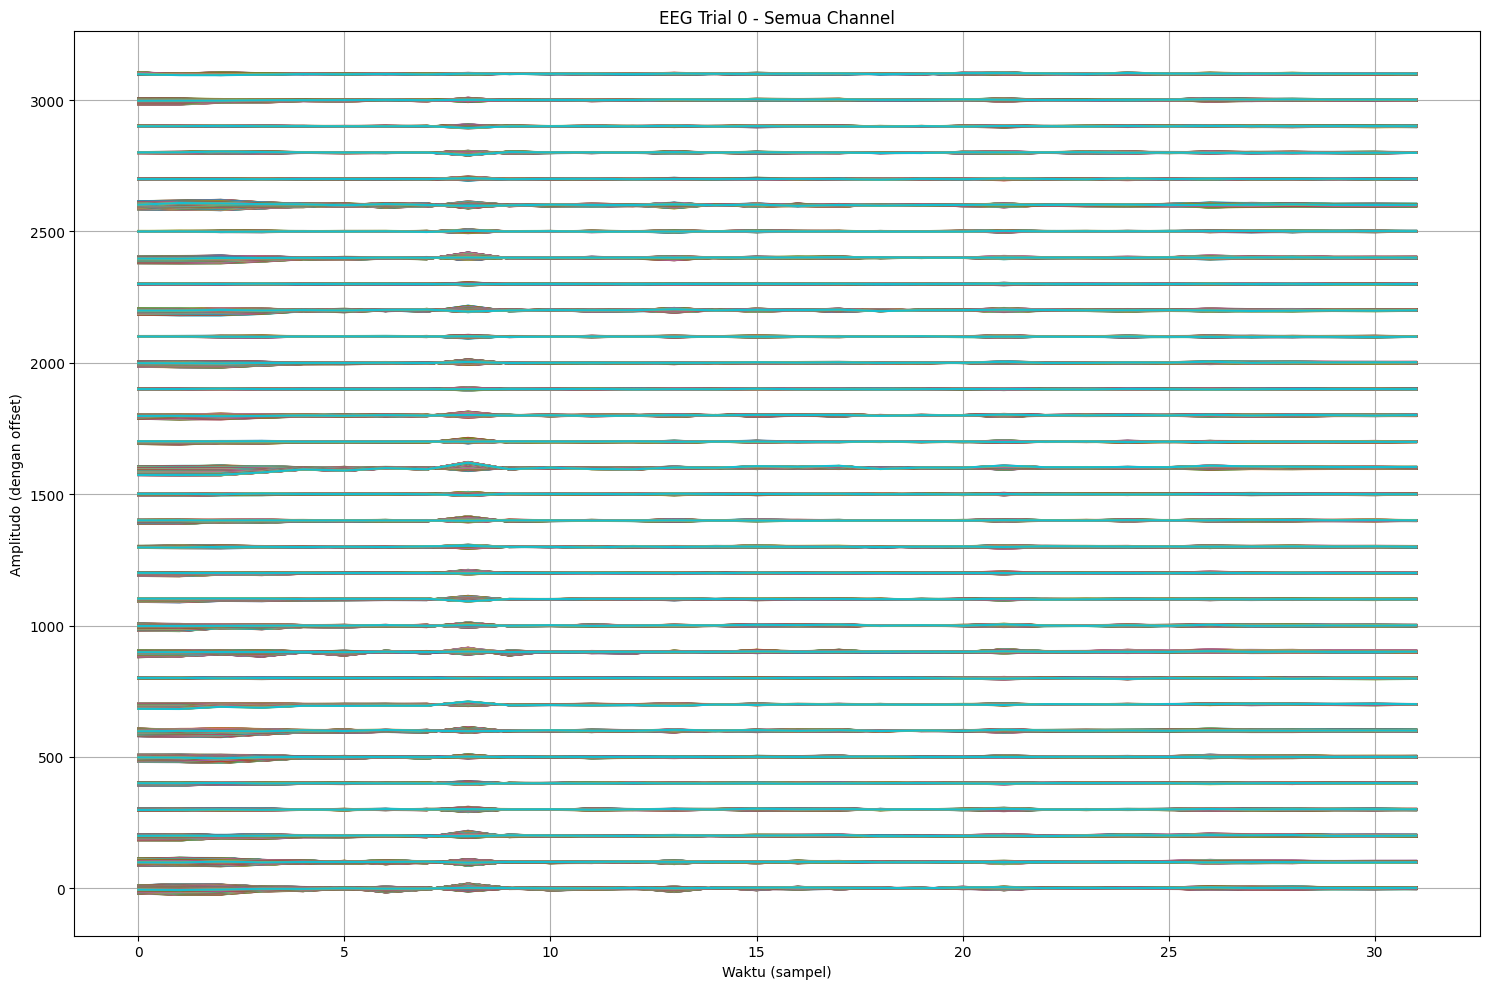

In [17]:
data = data[:100]
plt.figure(figsize=(15, 10))
for ch in range(32):
    plt.plot(data[ch] + ch * 100, label=f'Ch {ch+1}')  

plt.title("EEG Trial 0 - Semua Channel")
plt.xlabel("Waktu (sampel)")
plt.ylabel("Amplitudo (dengan offset)")
plt.grid()
plt.tight_layout()
plt.show()


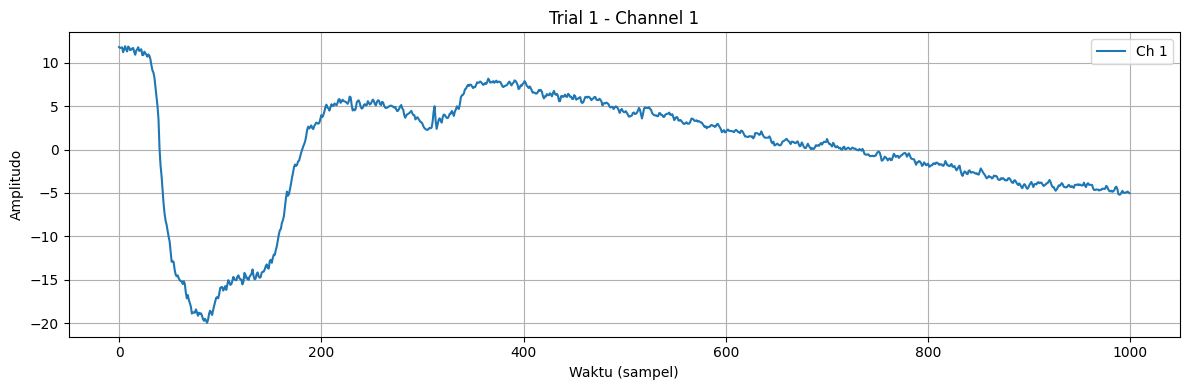

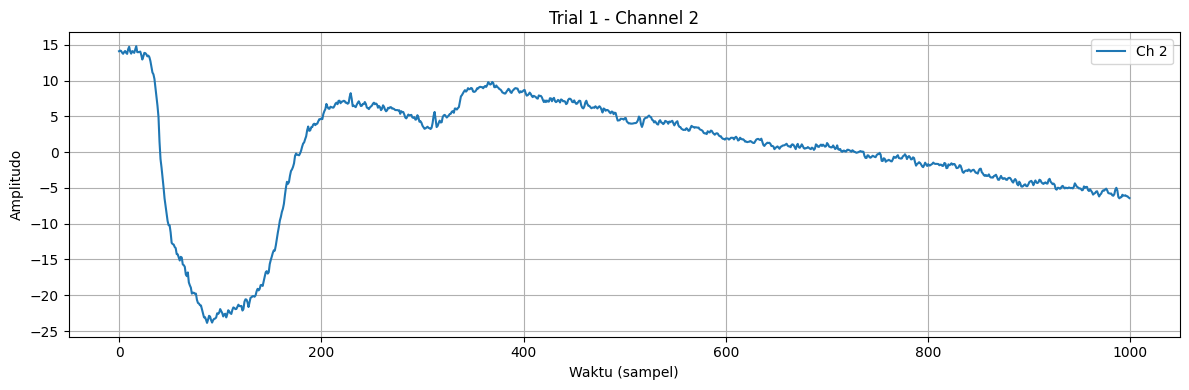

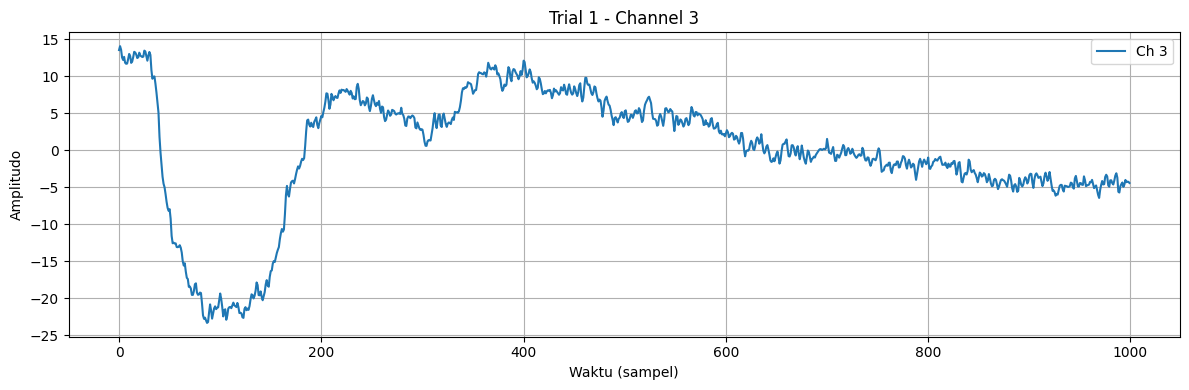

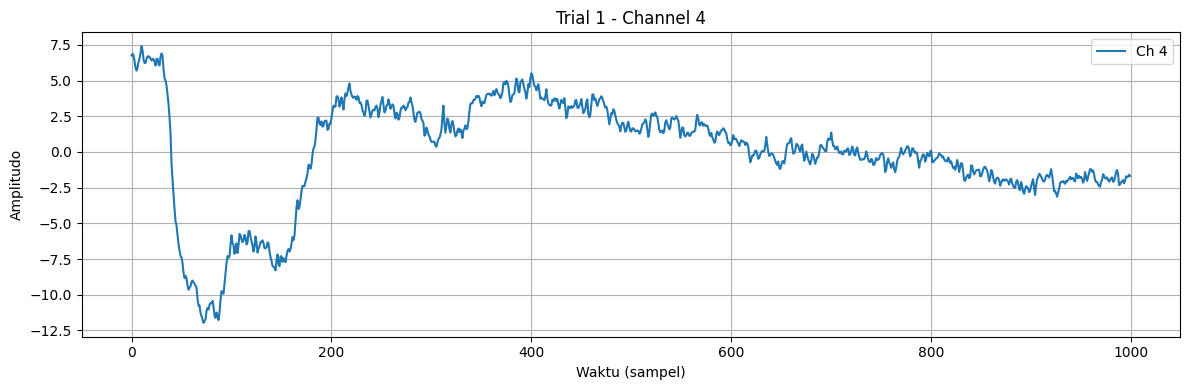

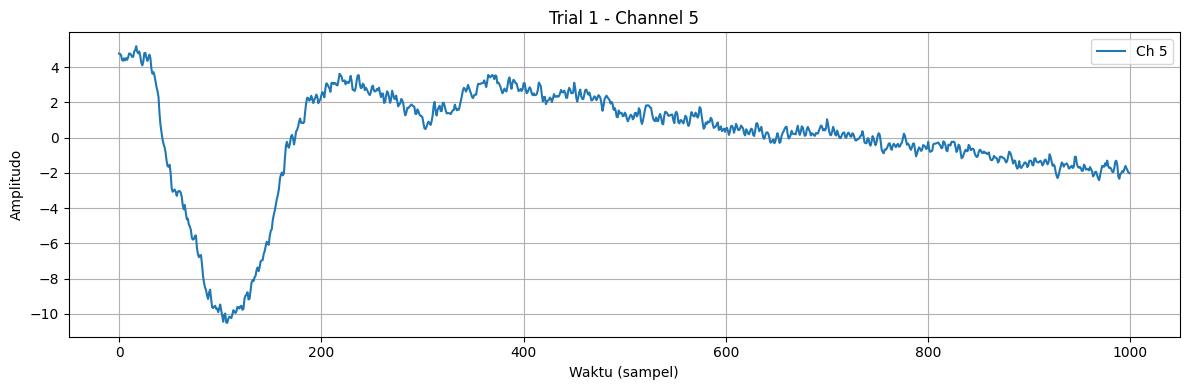

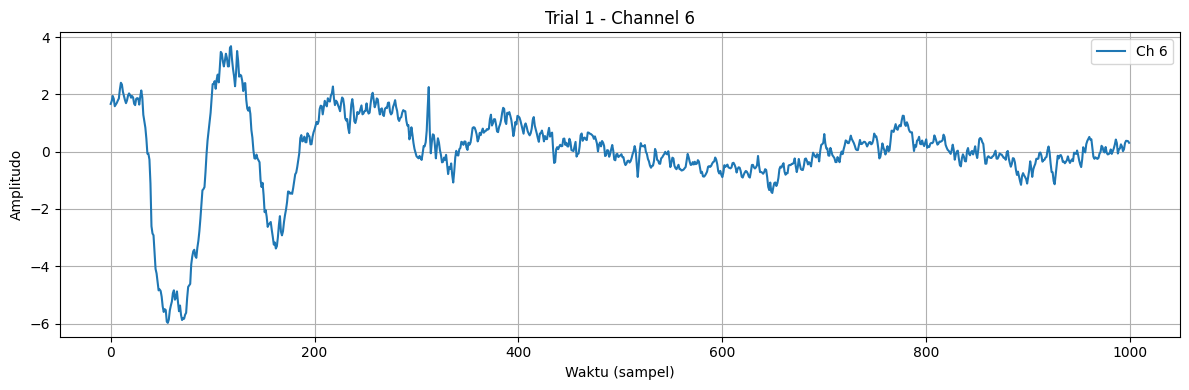

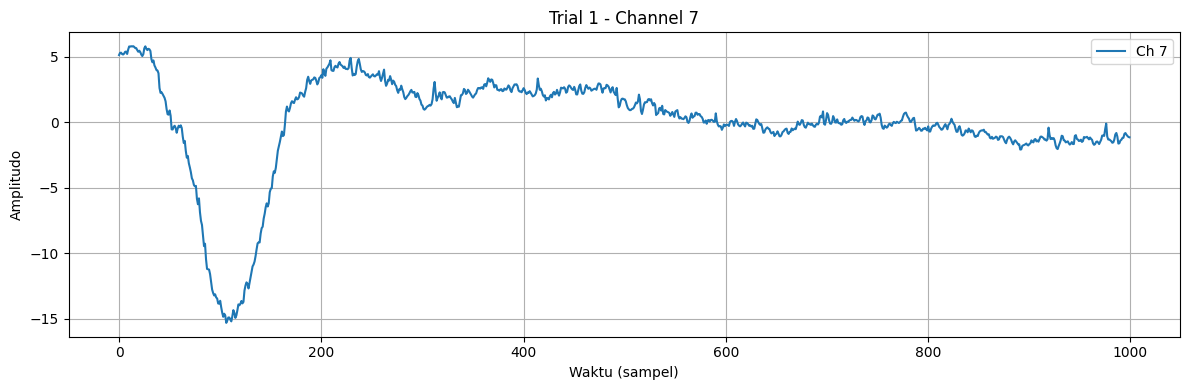

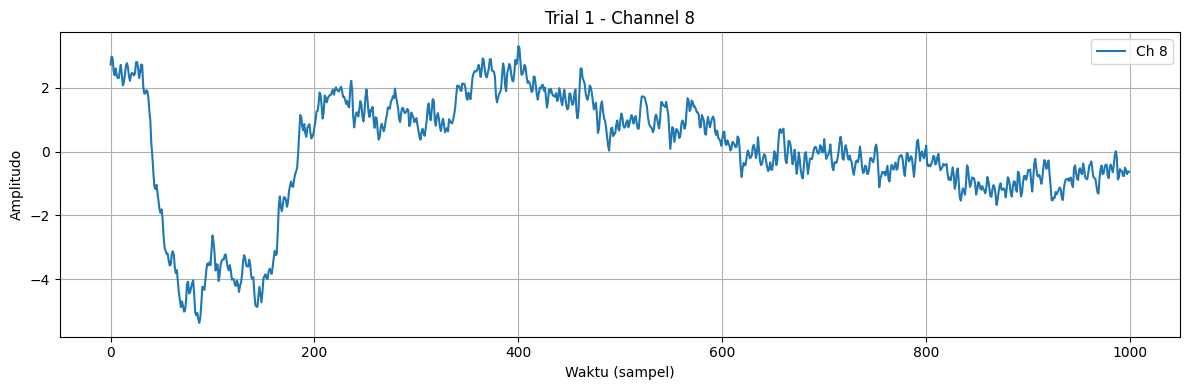

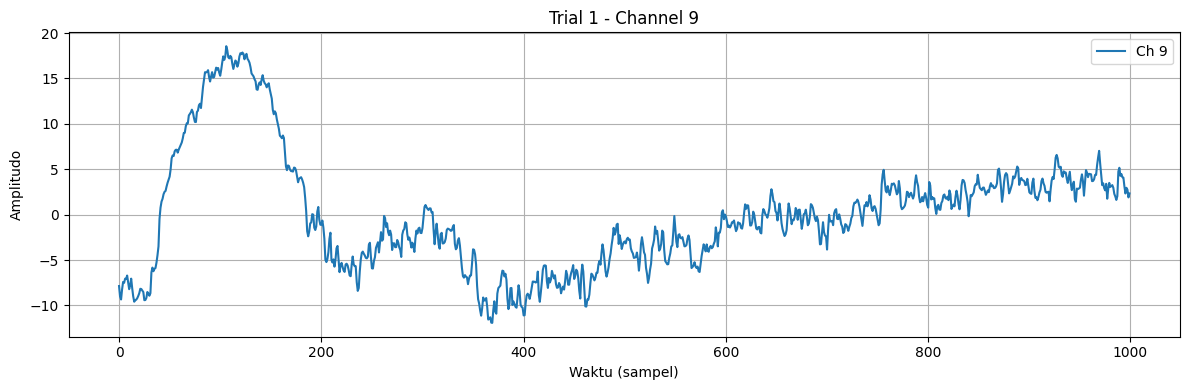

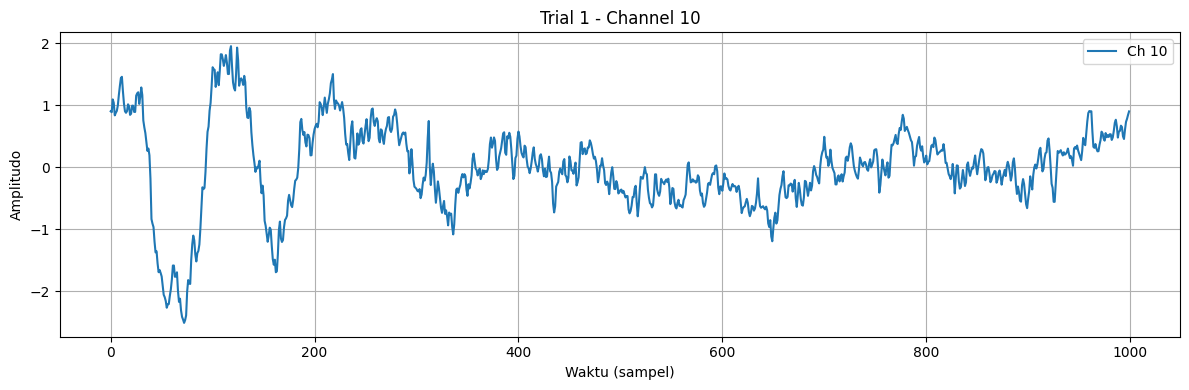

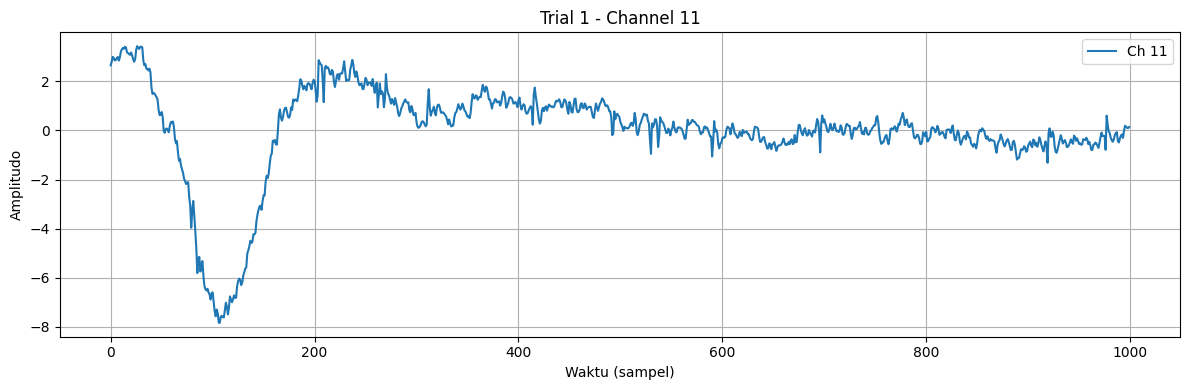

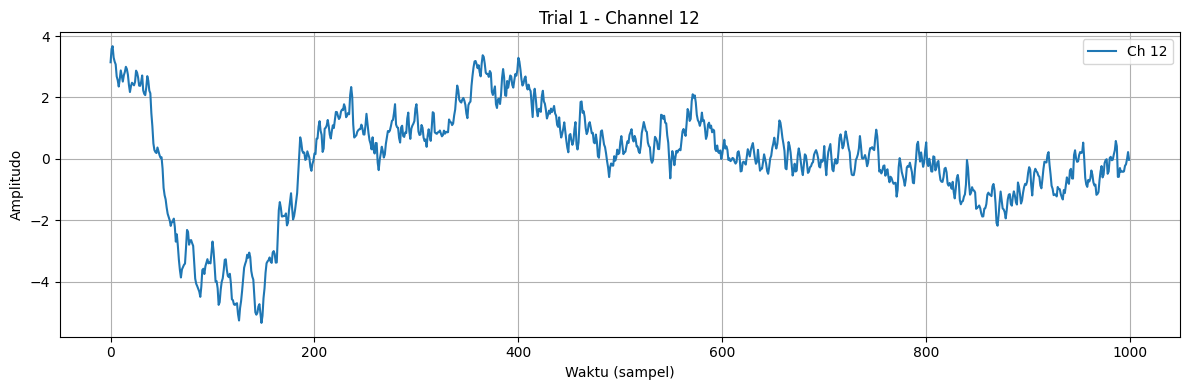

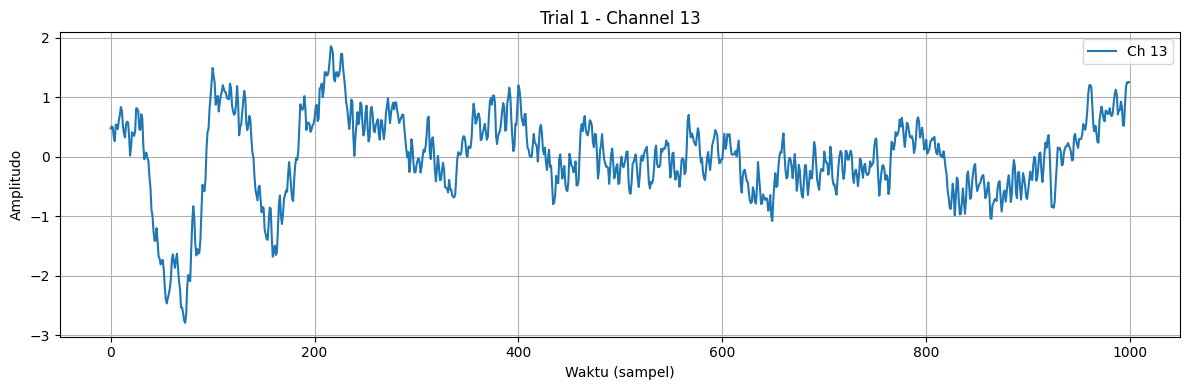

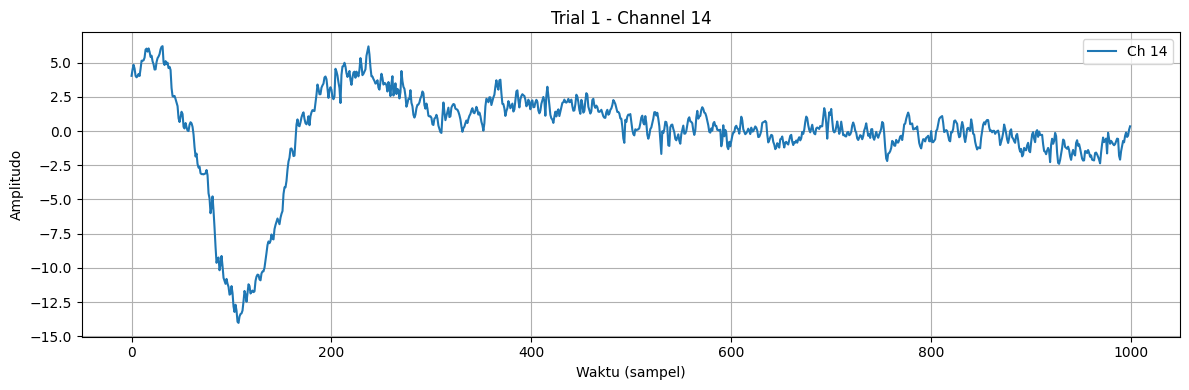

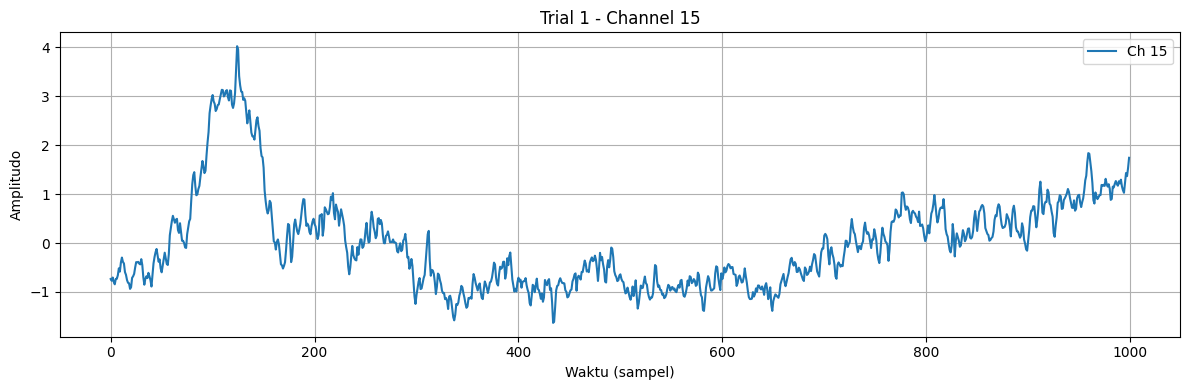

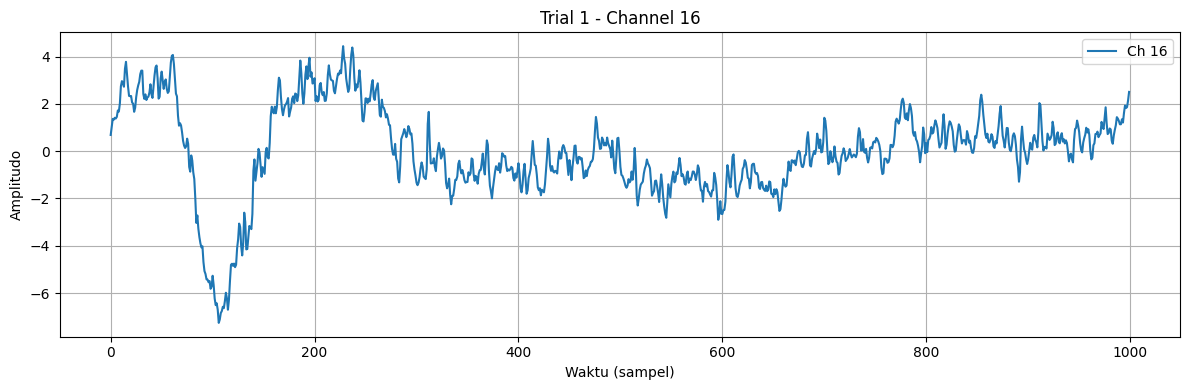

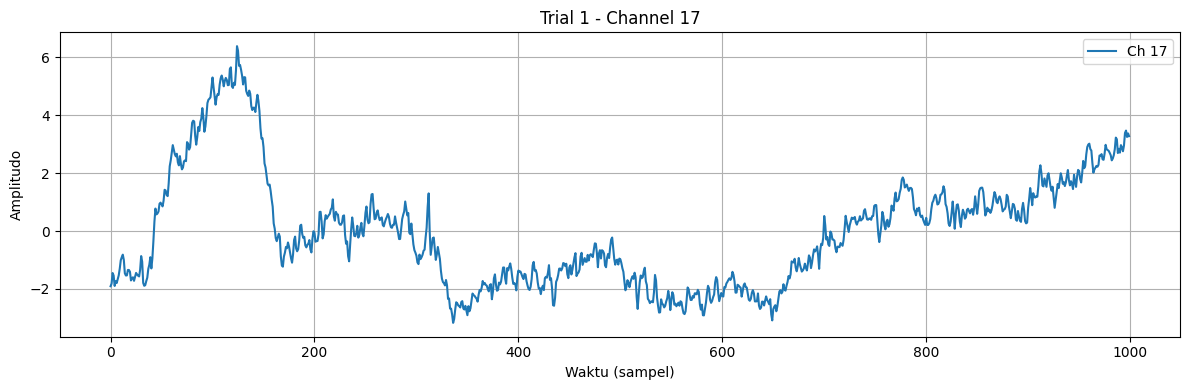

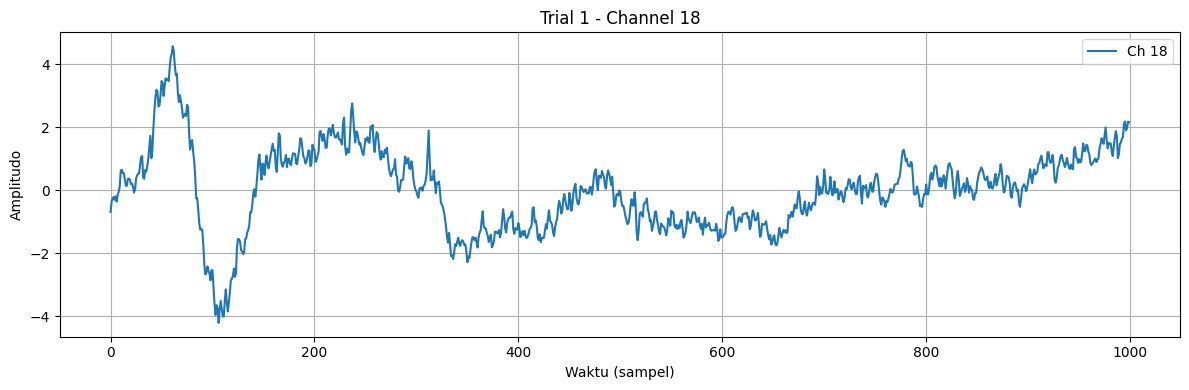

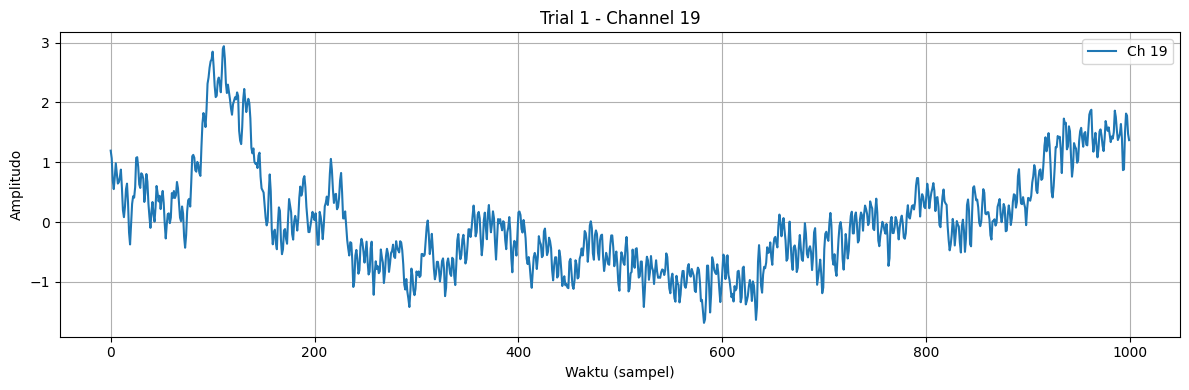

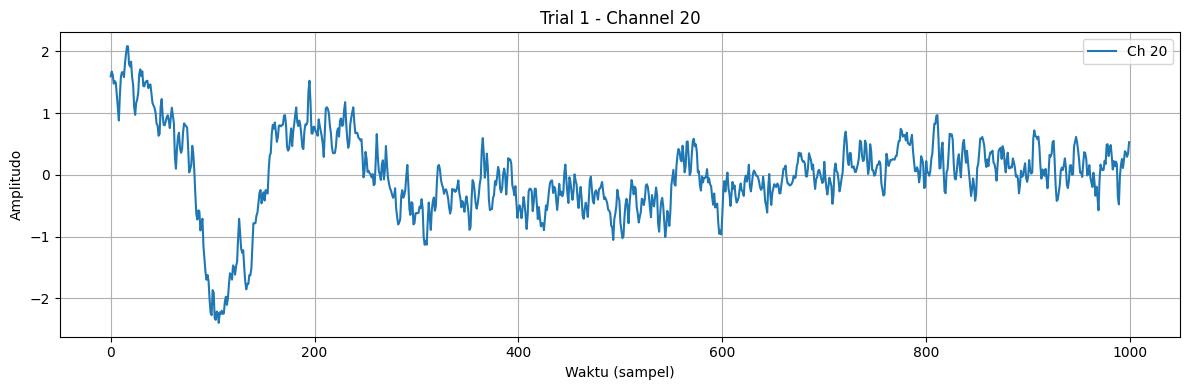

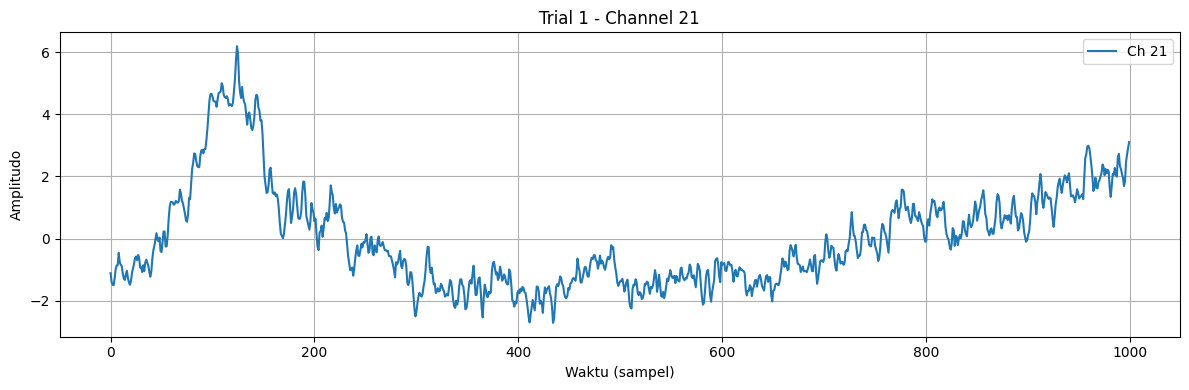

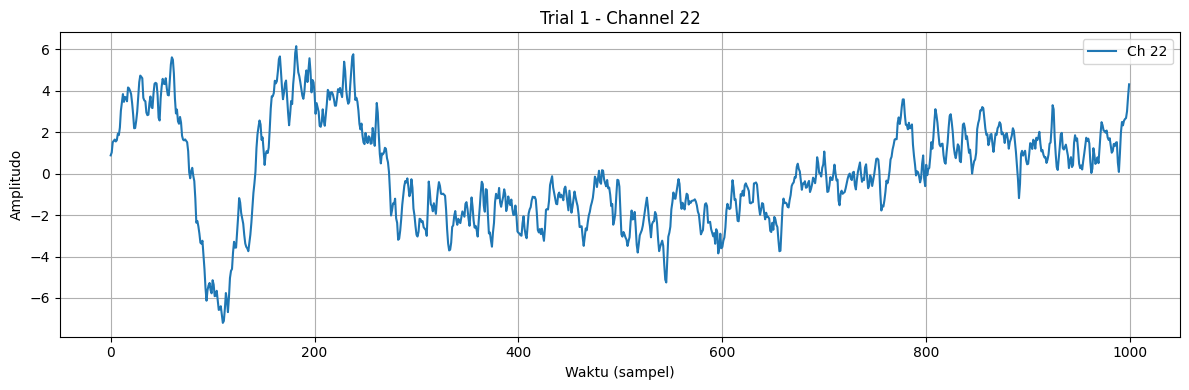

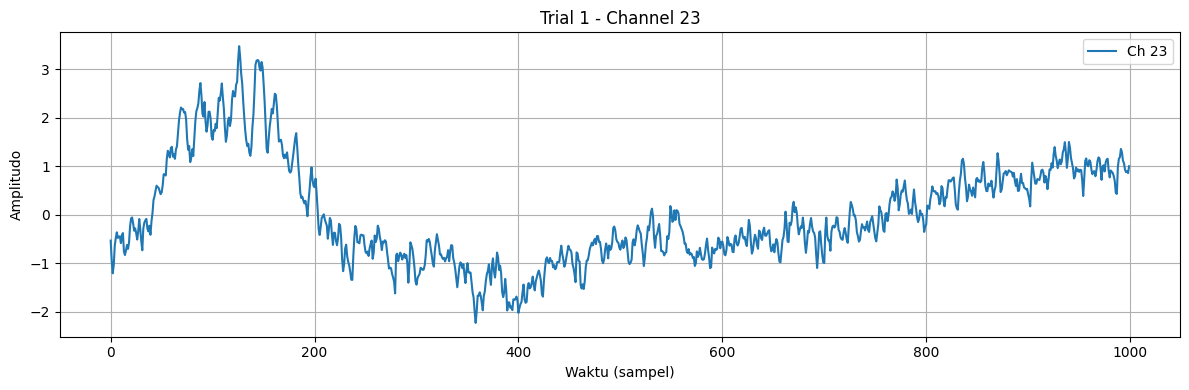

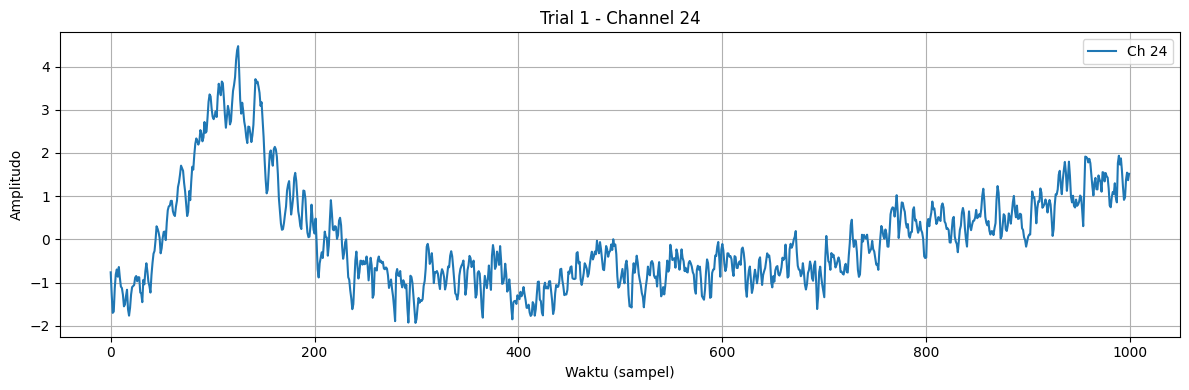

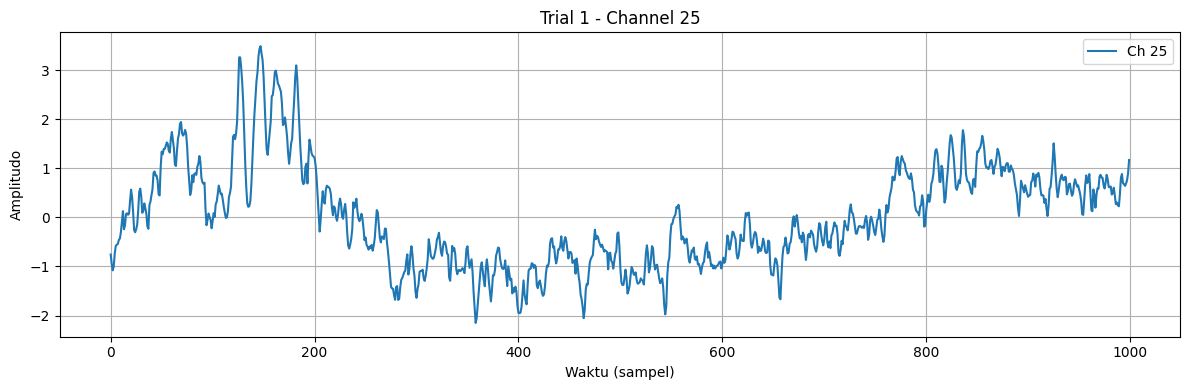

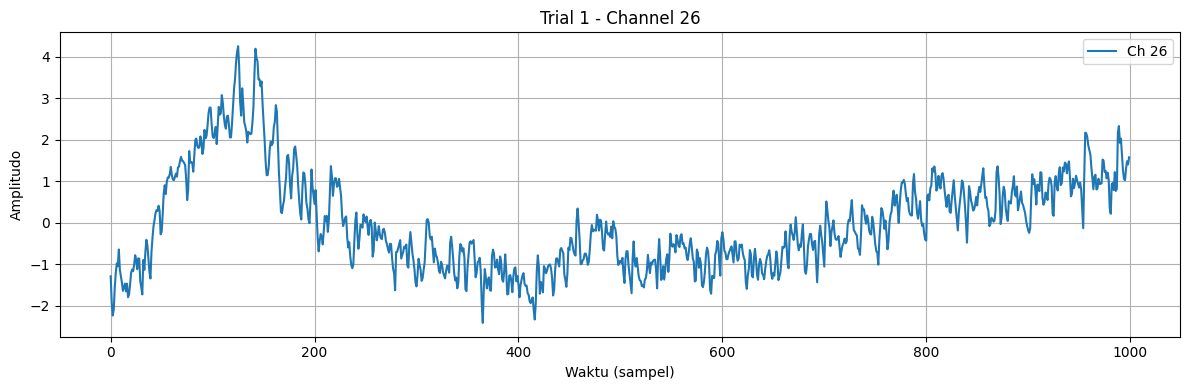

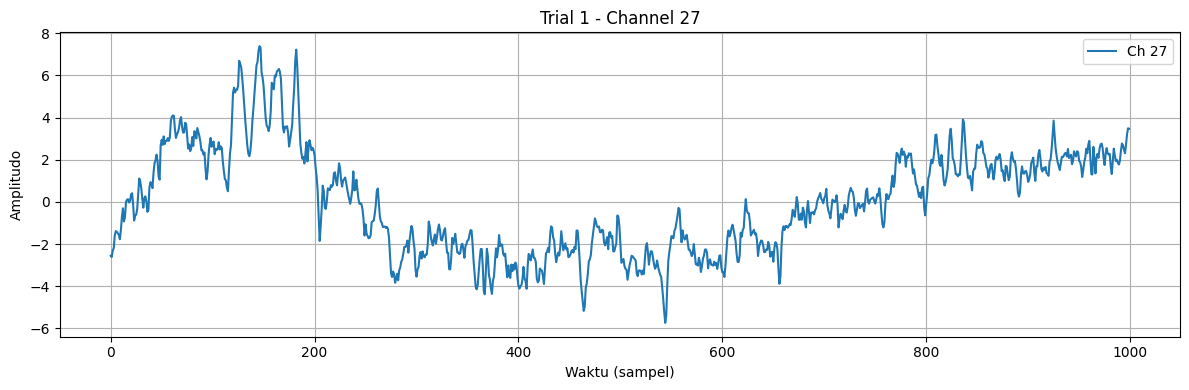

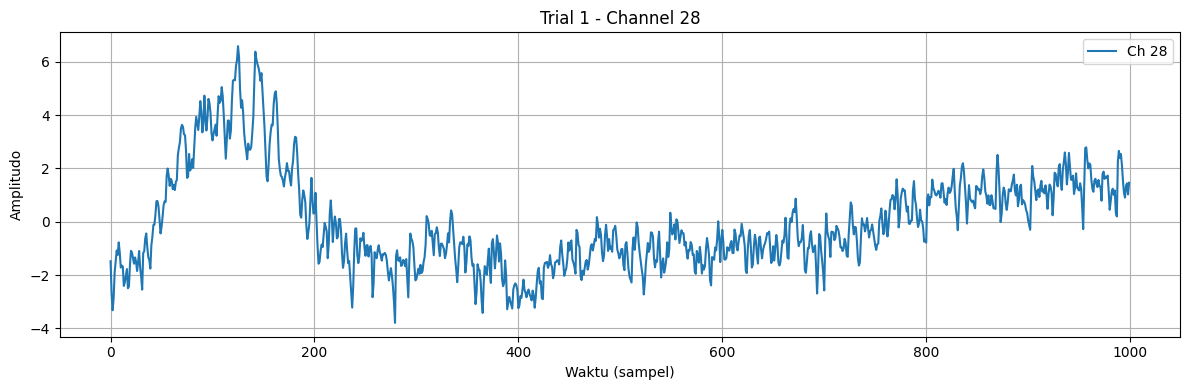

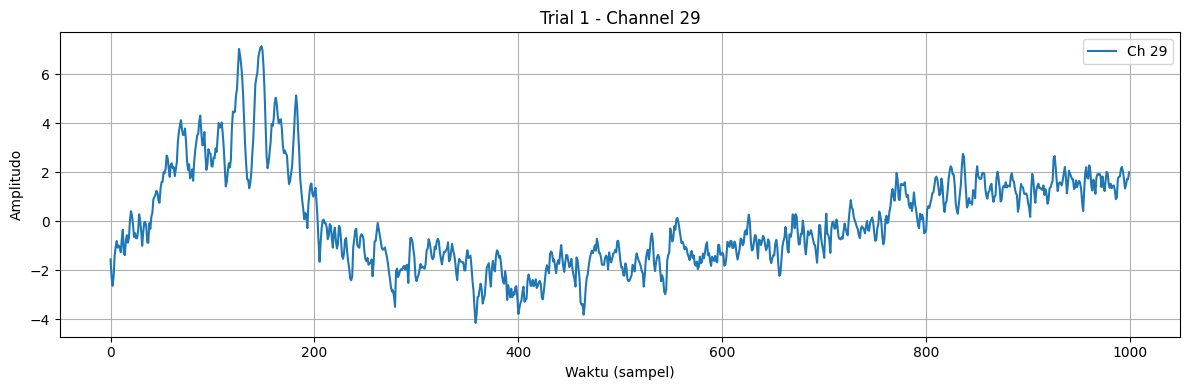

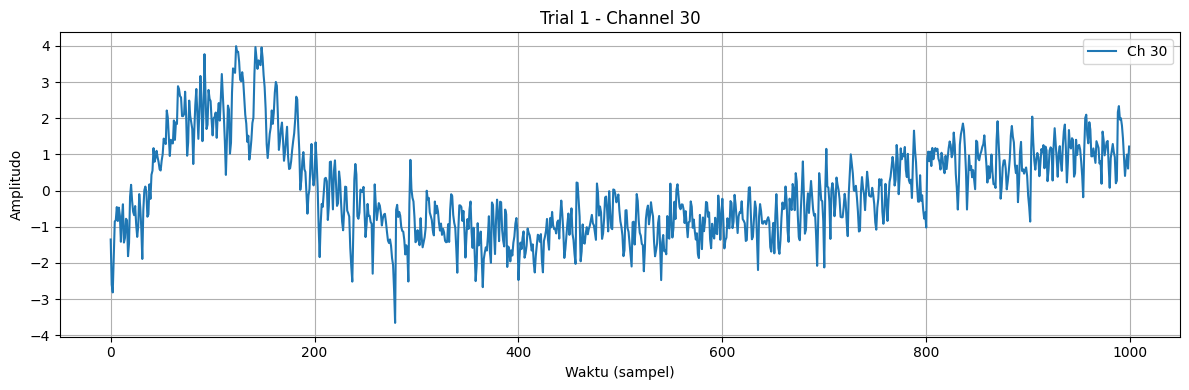

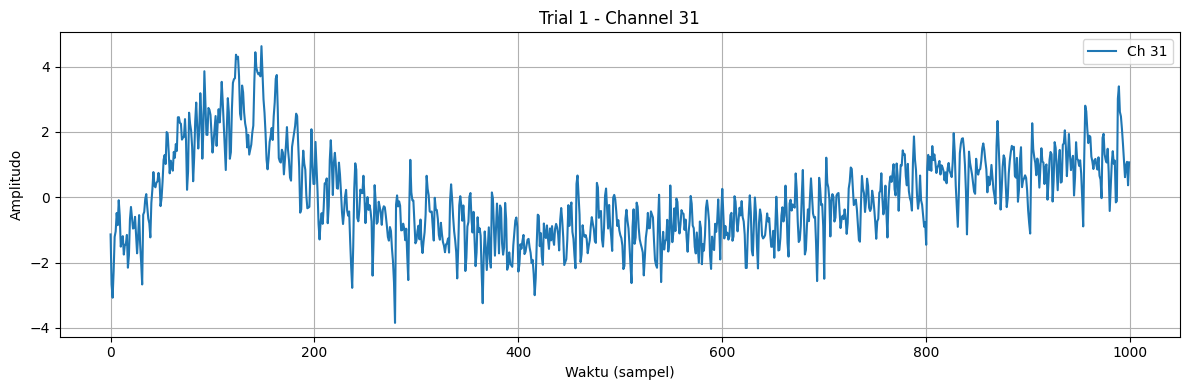

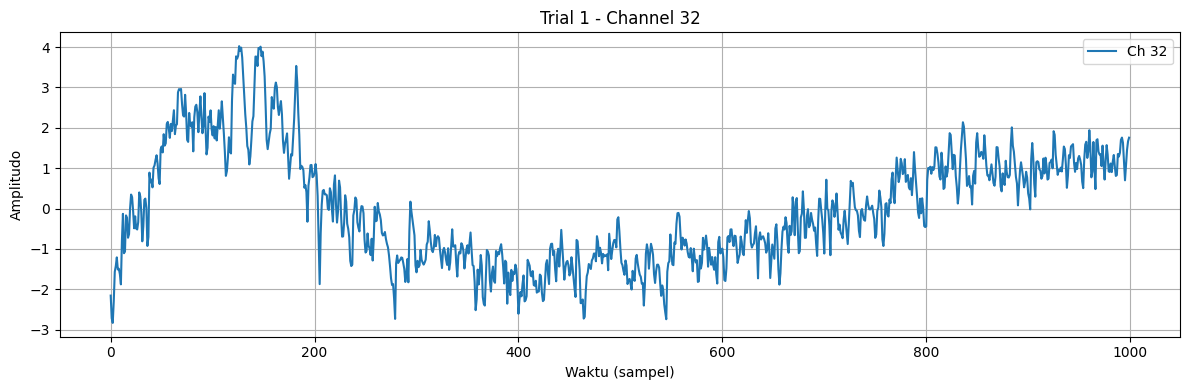

In [18]:
trial_idx = 0
data_grafik = data[0]

for ch in range(32):
    plt.figure(figsize=(12, 4))
    plt.plot(data_grafik[ch], label=f'Ch {ch+1}')
    plt.title(f'Trial {trial_idx+1} - Channel {ch+1}')
    plt.xlabel("Waktu (sampel)")
    plt.ylabel("Amplitudo")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

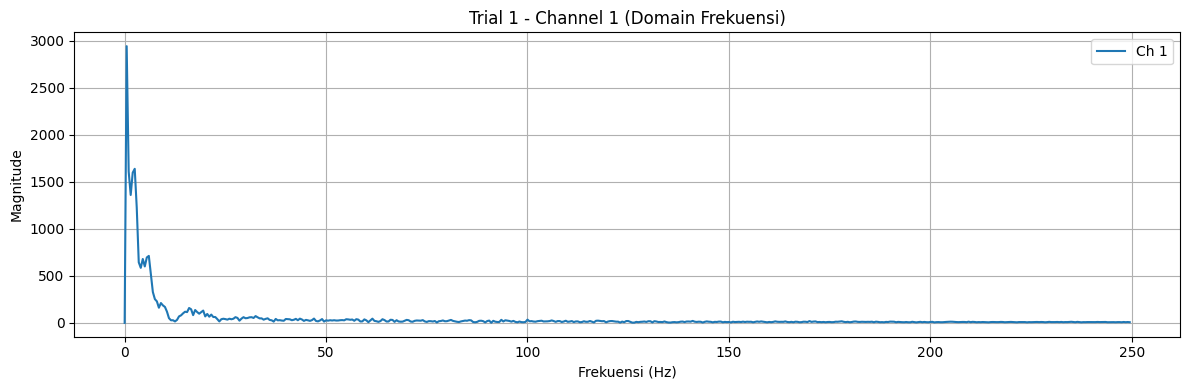

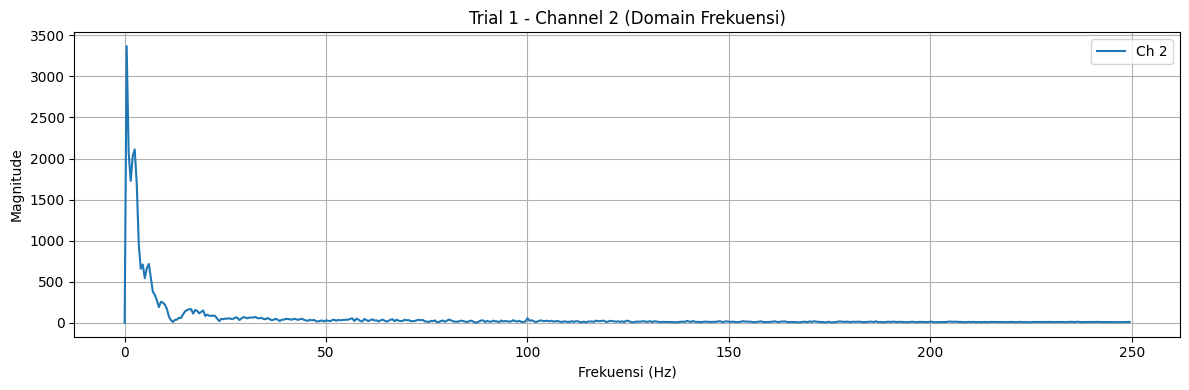

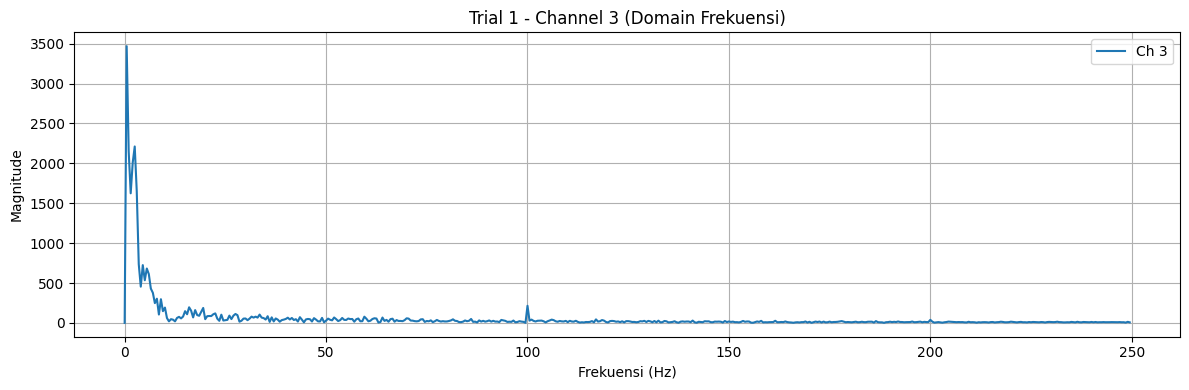

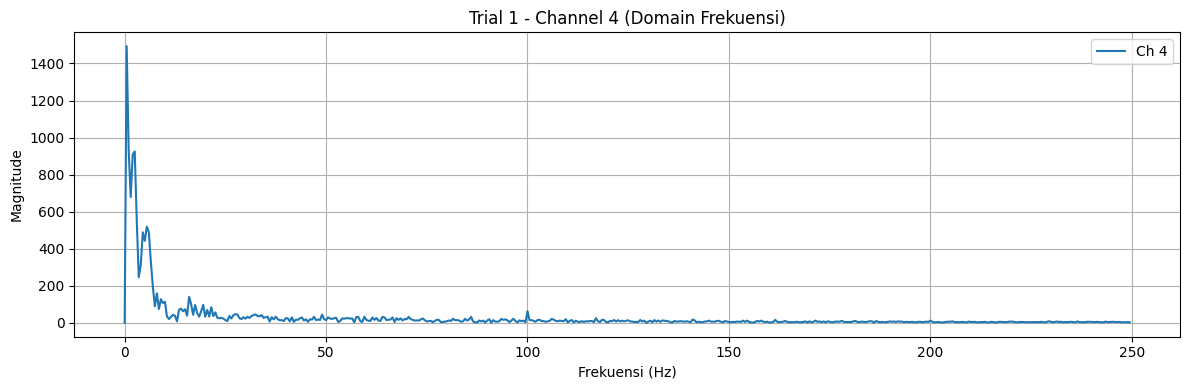

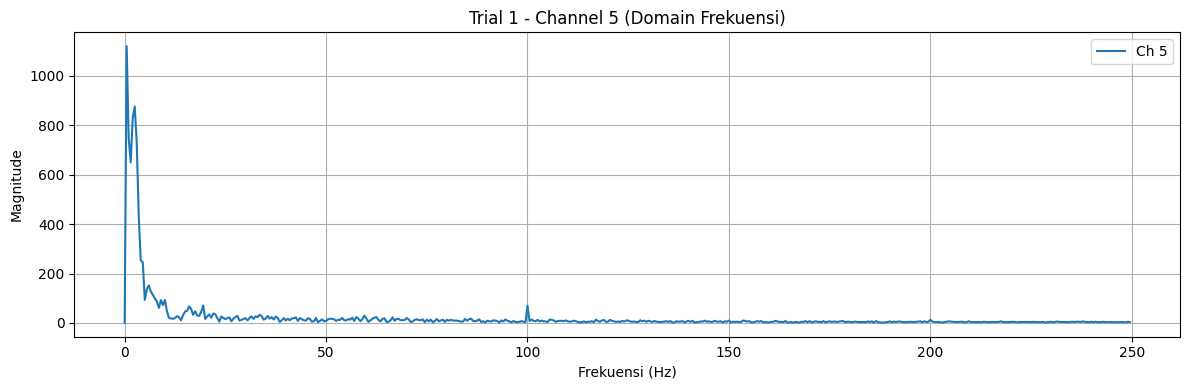

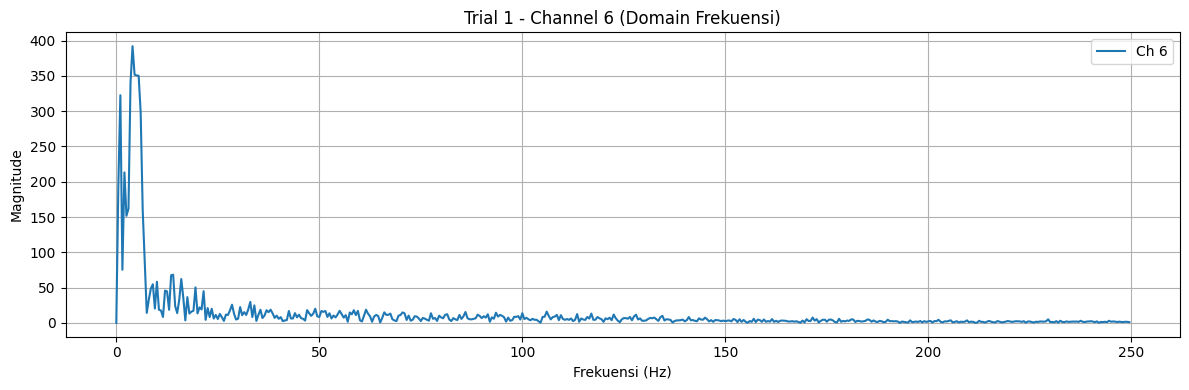

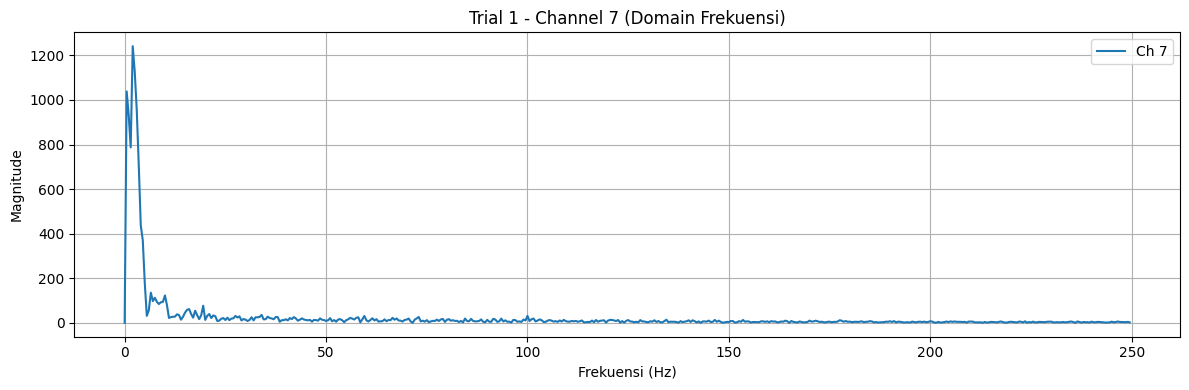

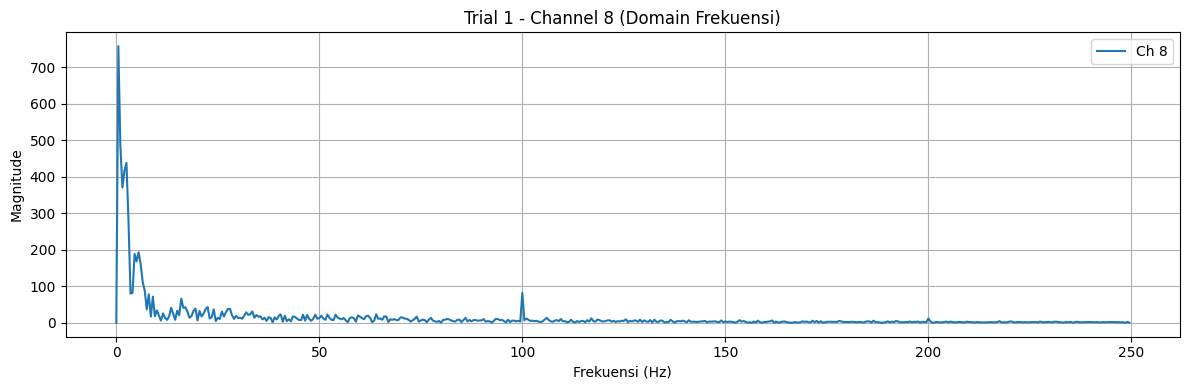

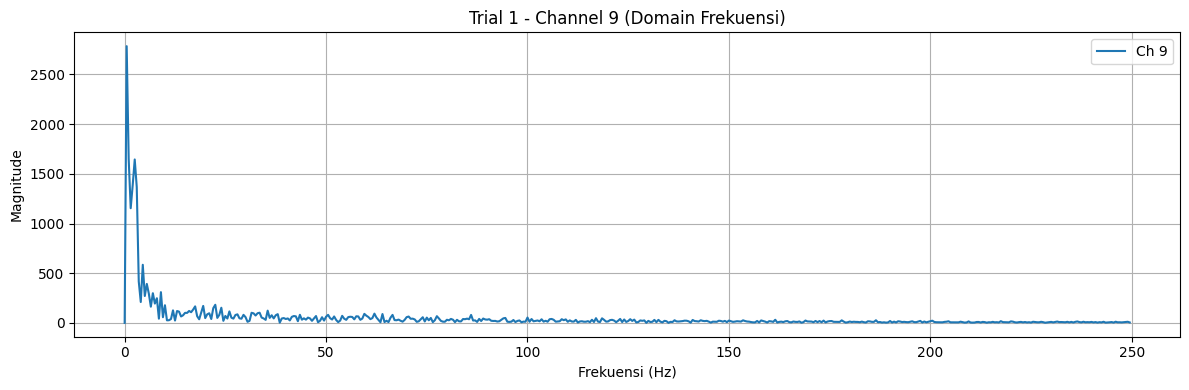

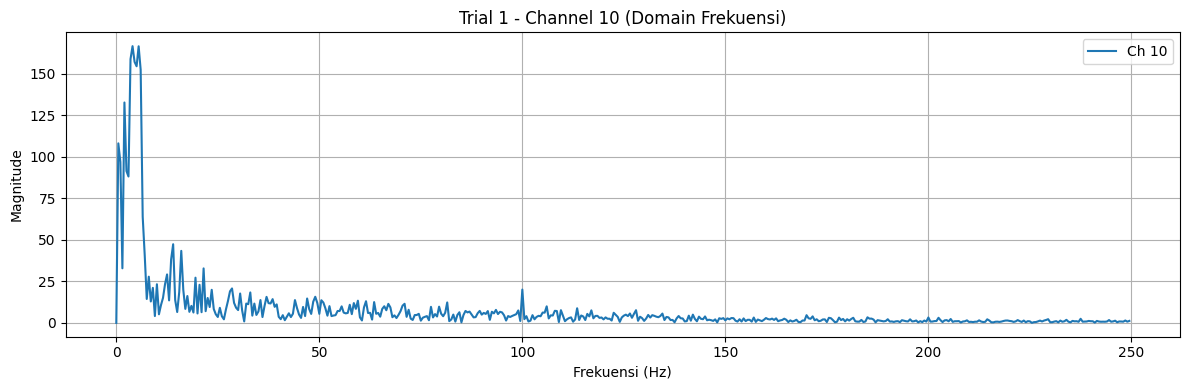

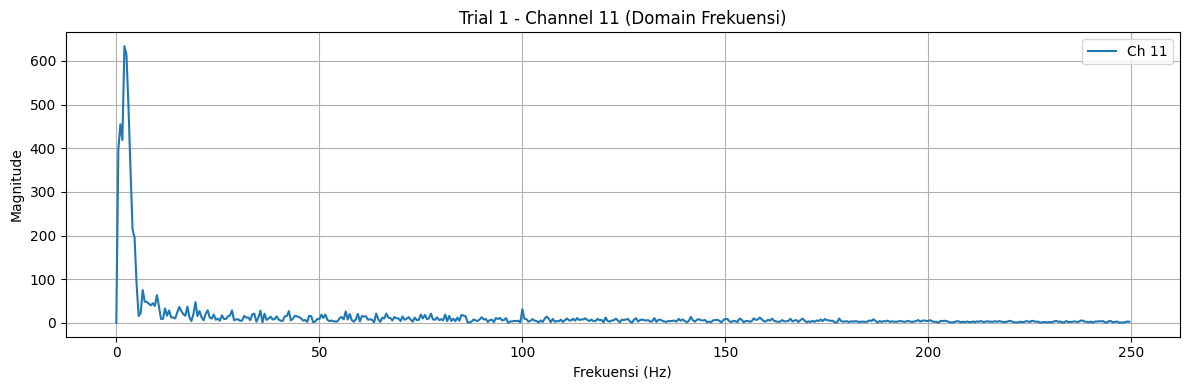

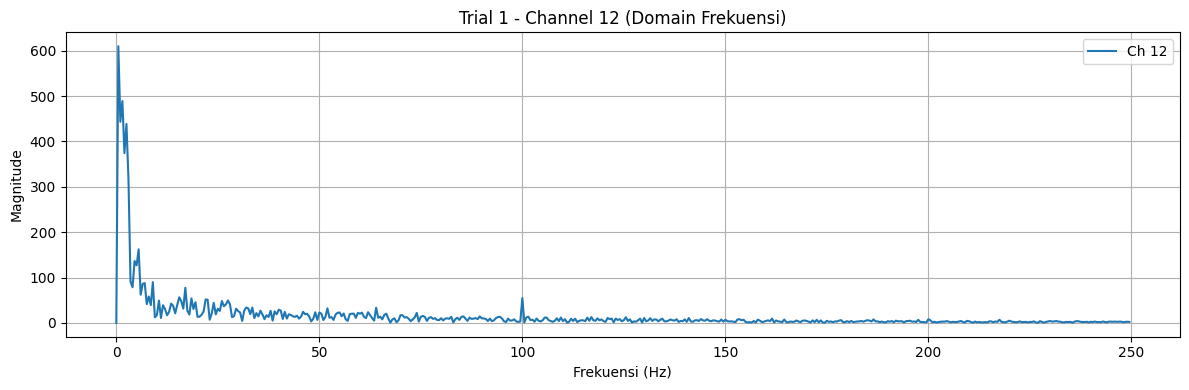

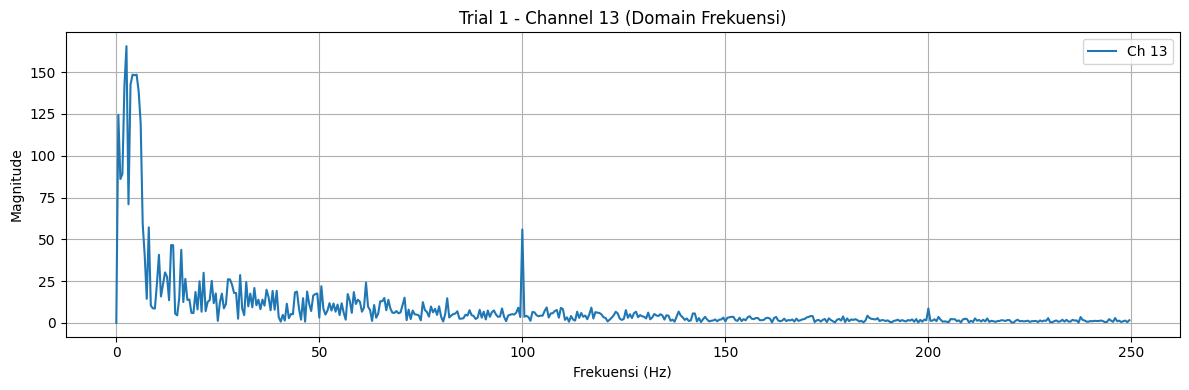

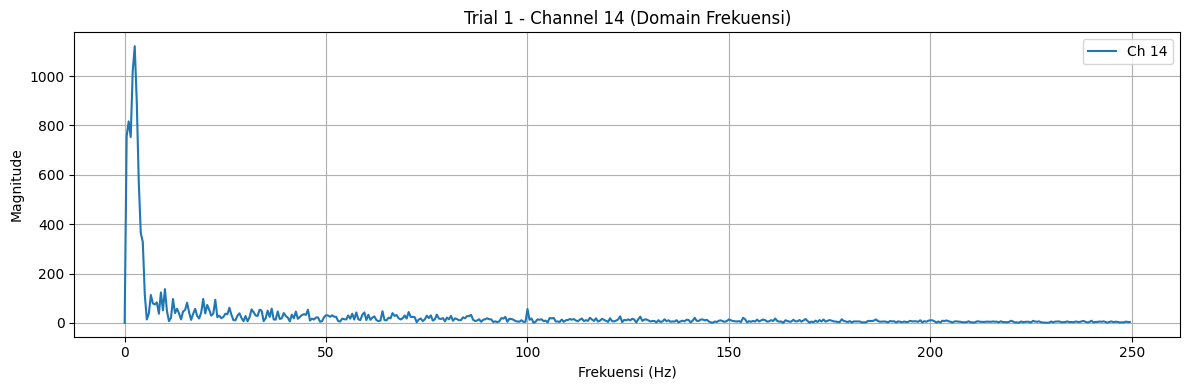

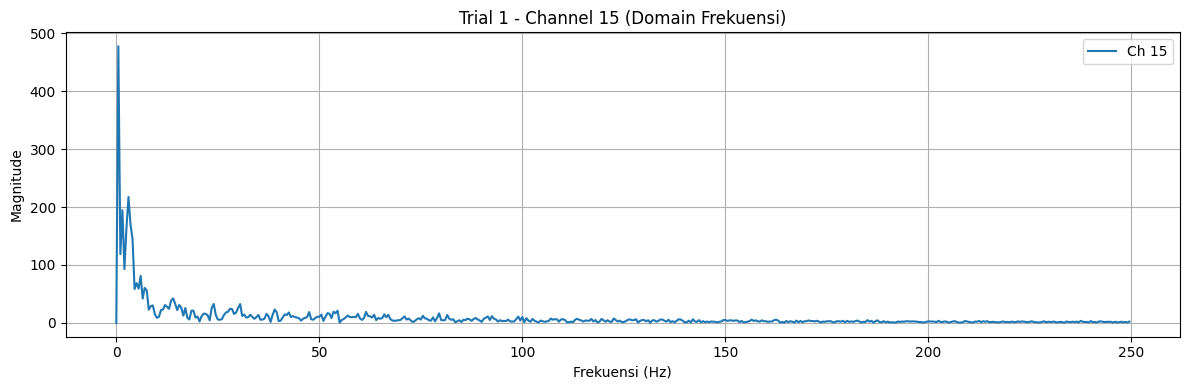

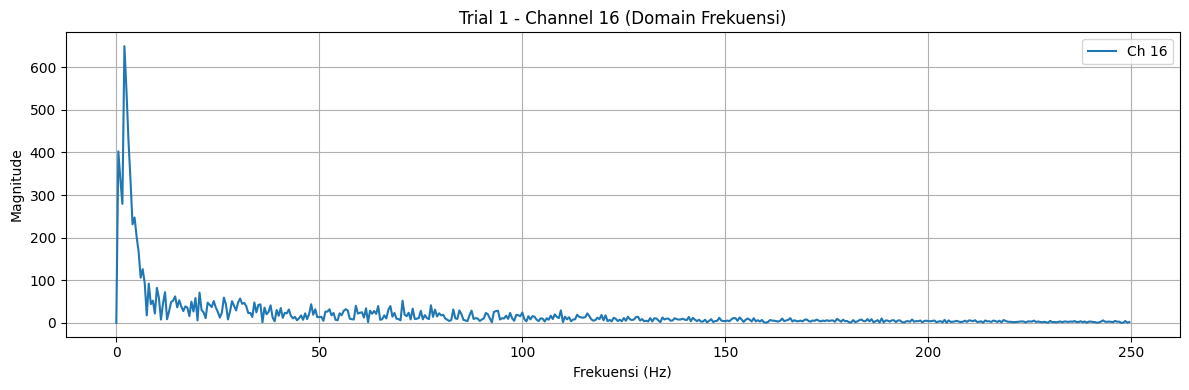

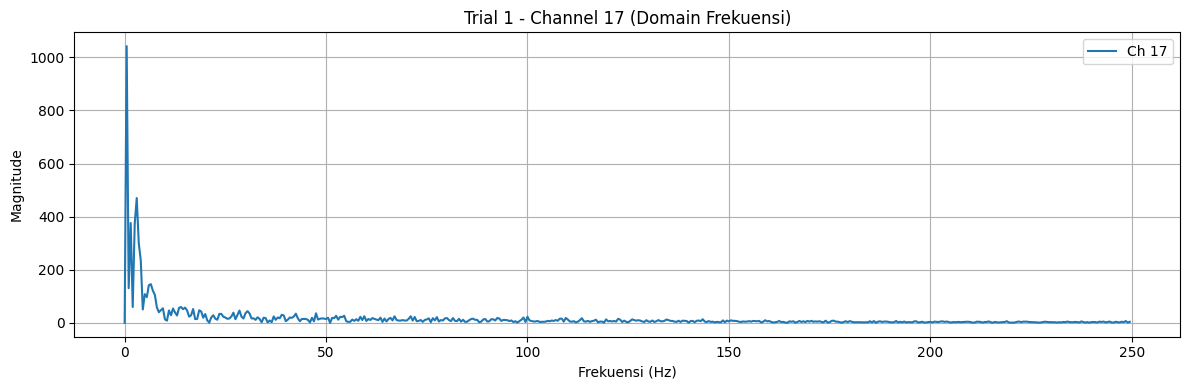

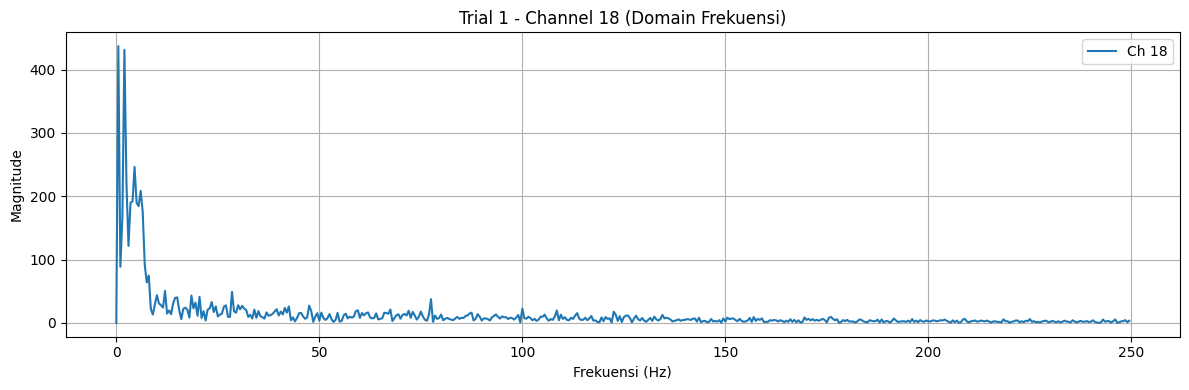

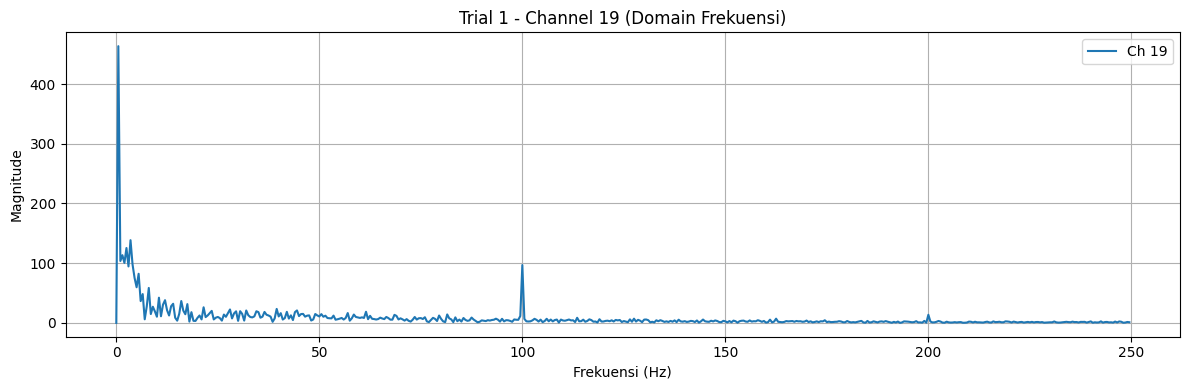

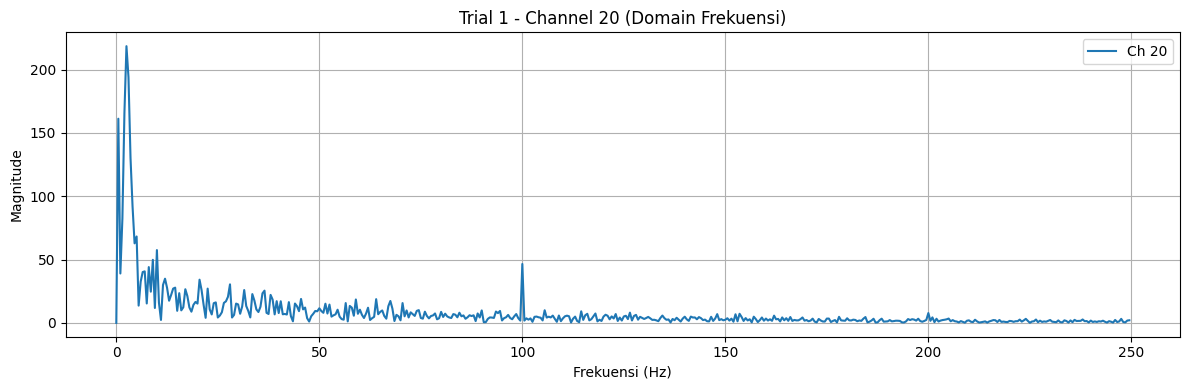

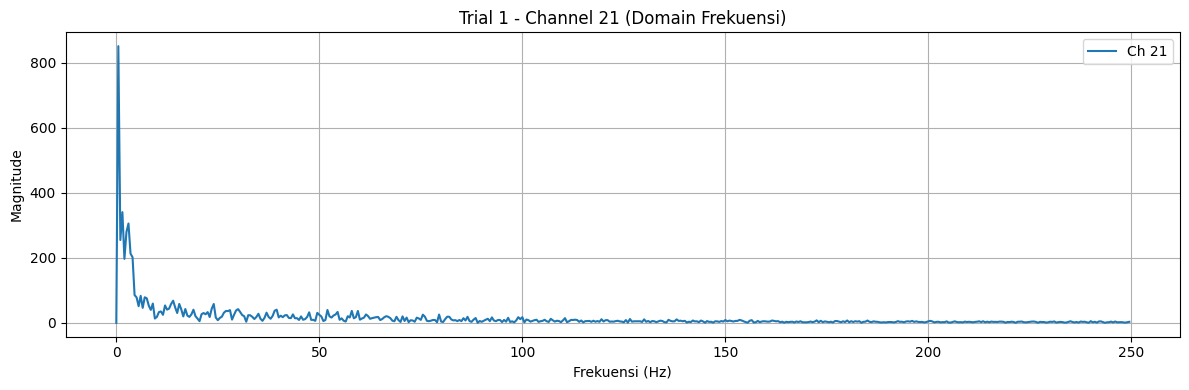

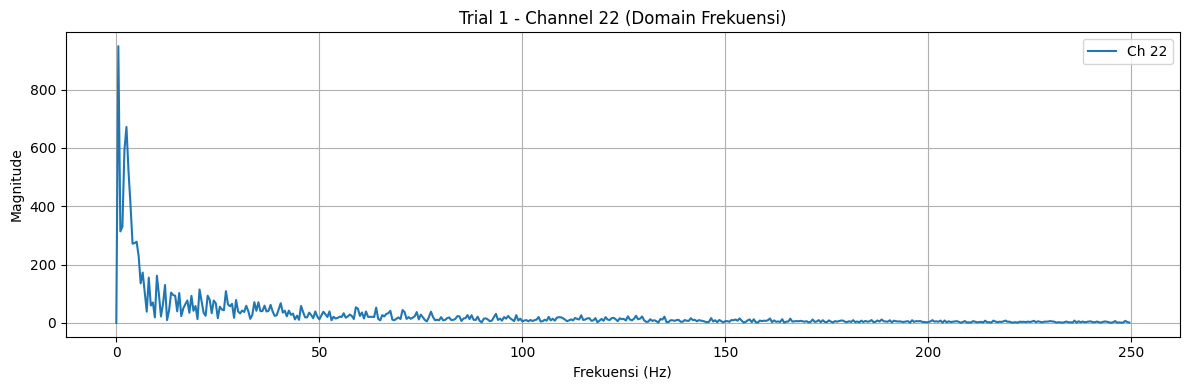

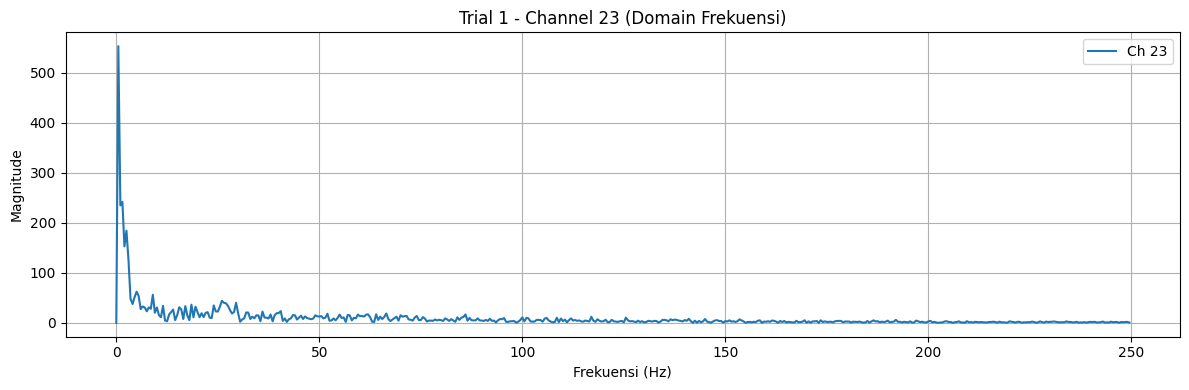

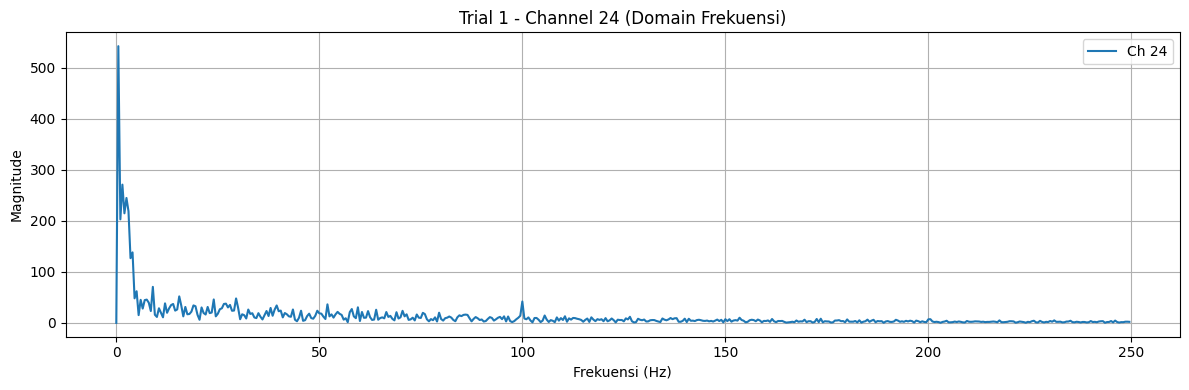

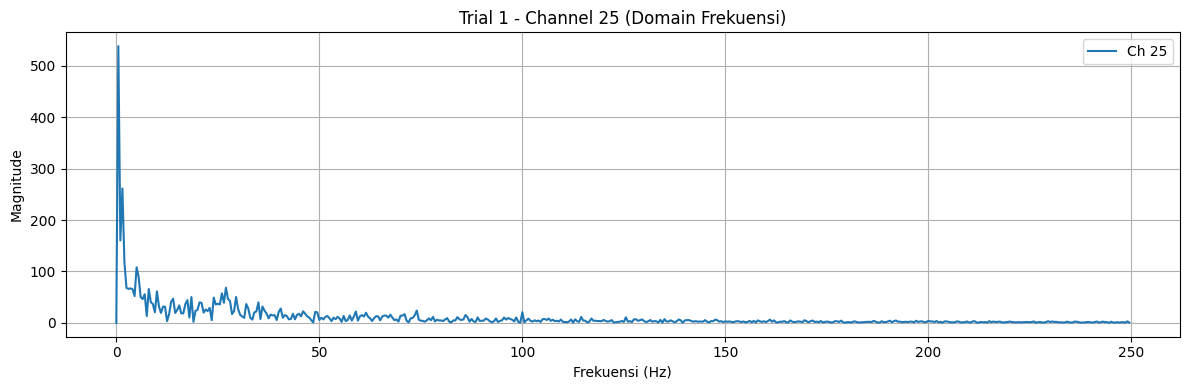

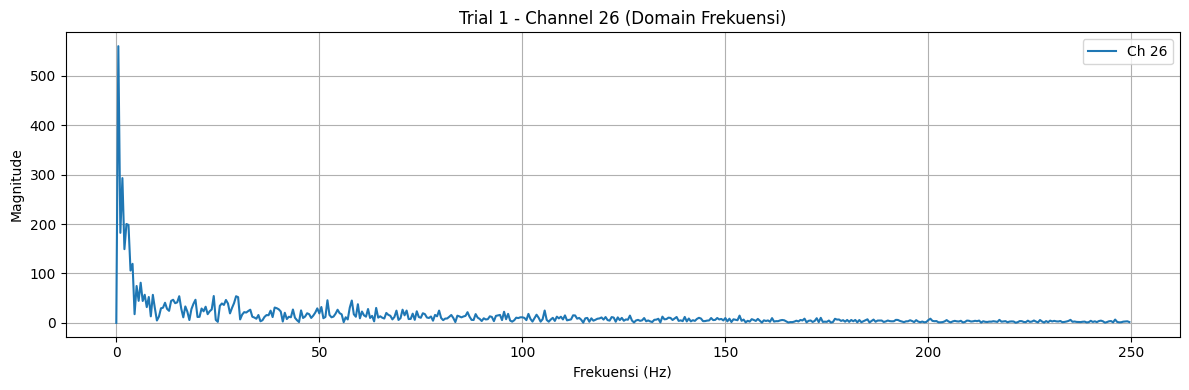

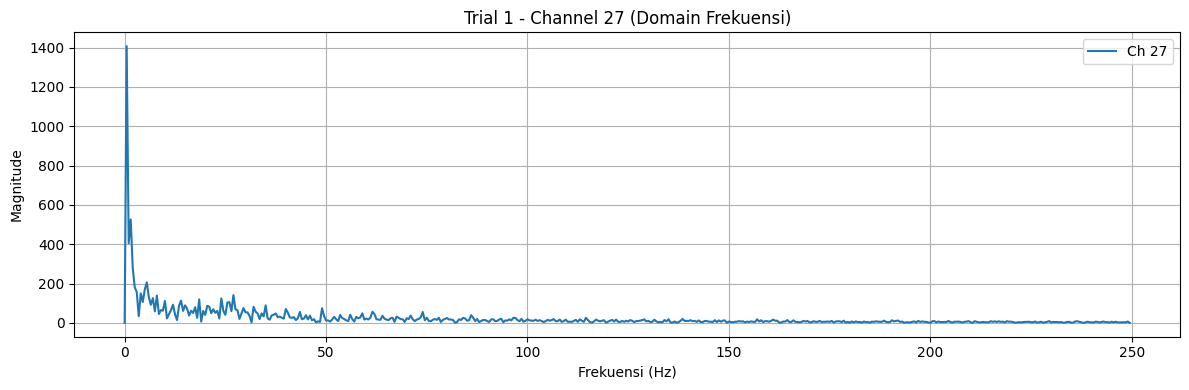

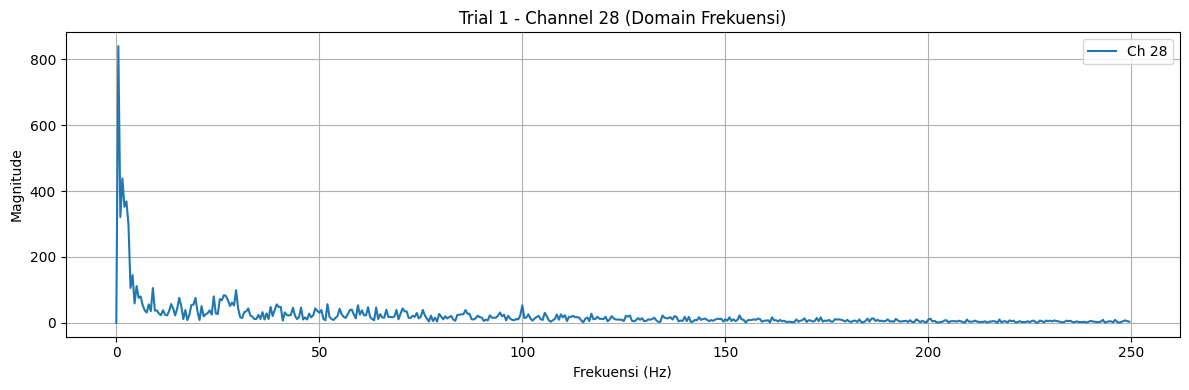

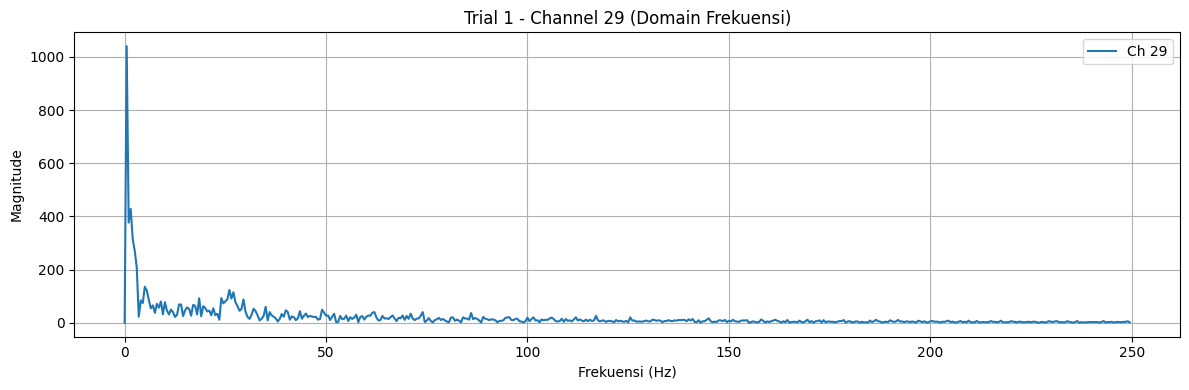

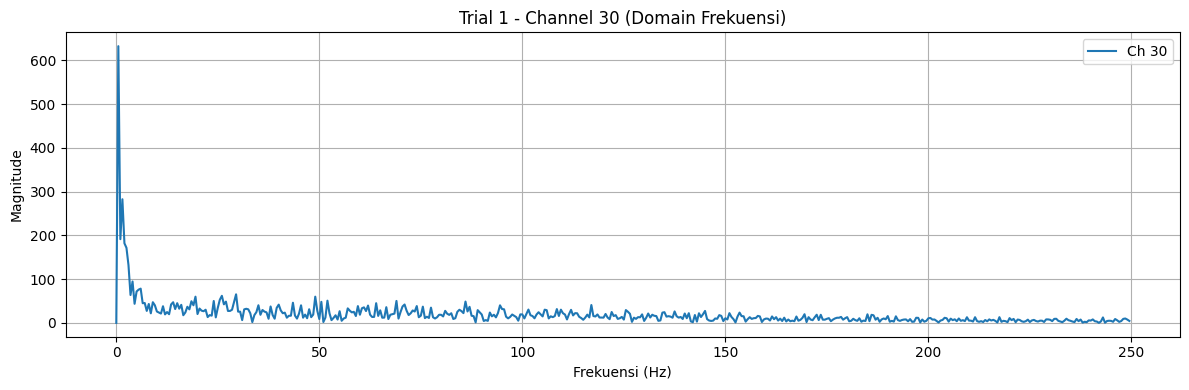

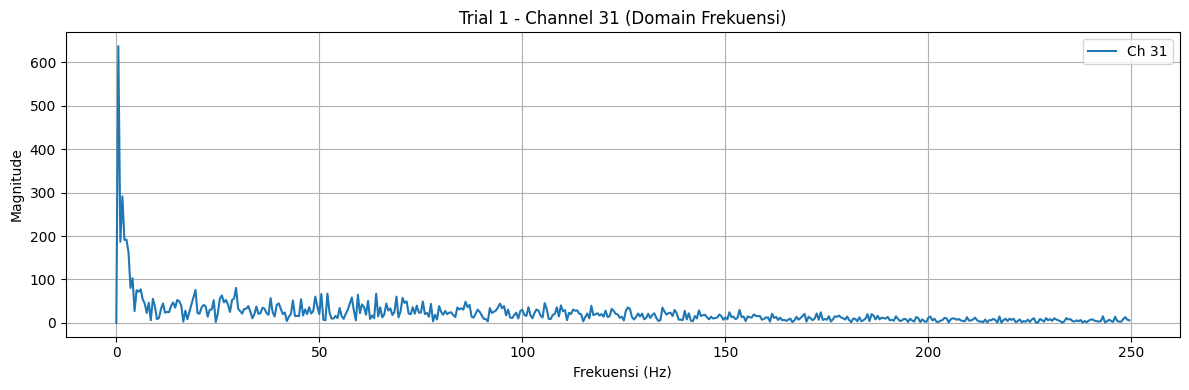

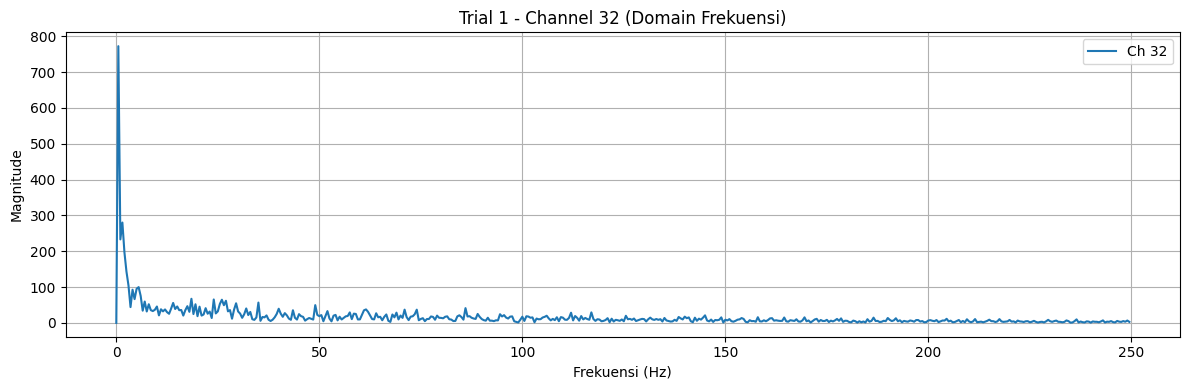

In [19]:
pole = 4
samp_freq = 500  # Hz
T = 1 / samp_freq  # Interval sampling (detik)

for ch in range(32):
    signal = data_grafik[ch]
    N = len(signal)
    
    # FFT dan spektrum frekuensi
    fft_values = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, T)
    
    # Ambil setengah spektrum positif
    fft_values = fft_values[:N // 2]
    freqs = freqs[:N // 2]
    
    # Plot spektrum frekuensi
    plt.figure(figsize=(12, 4))
    plt.plot(freqs, np.abs(fft_values), label=f'Ch {ch+1}')
    plt.title(f'Trial {trial_idx+1} - Channel {ch+1} (Domain Frekuensi)')
    plt.xlabel("Frekuensi (Hz)")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

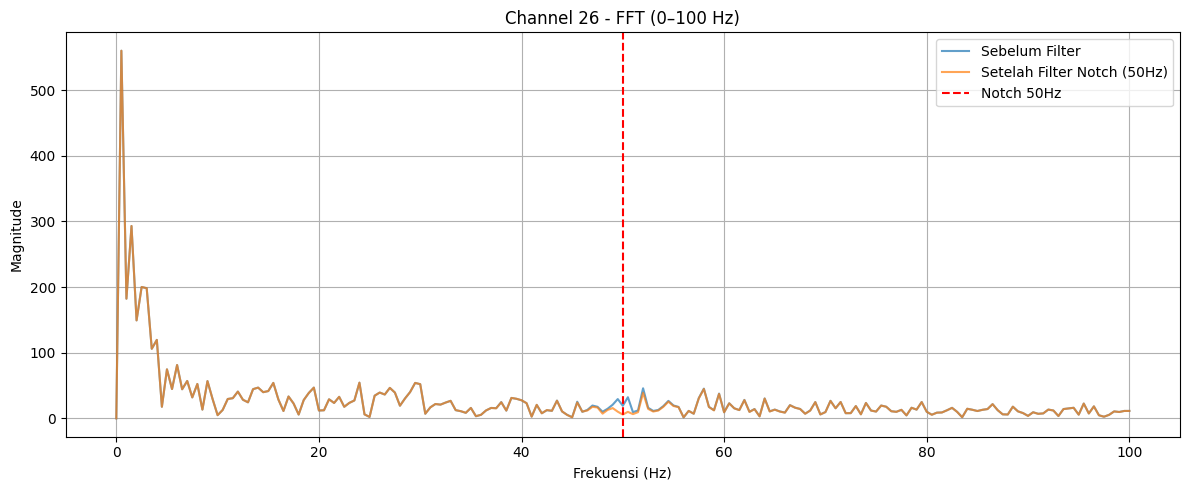

In [24]:
# Parameter
fs = 500            # Frekuensi sampling (Hz)
f0 = 50             # Frekuensi notch (contoh: 50 Hz untuk noise listrik)
Q = 30              # Faktor kualitas
T = 1 / fs          # Interval sampling

# Desain filter notch
b, a = iirnotch(f0, Q, fs)

# Pilih channel (contoh: channel 26 => index 25)
ch = 25
signal = data_grafik[ch]
N = len(signal)

# Filter sinyal
filtered_signal = filtfilt(b, a, signal)

# FFT sebelum filter
fft_orig = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, T)
fft_orig = np.abs(fft_orig[:N // 2])
freqs = freqs[:N // 2]

# FFT sesudah filter
fft_filt = np.fft.fft(filtered_signal)
fft_filt = np.abs(fft_filt[:N // 2])

# Batasi hanya sampai 100 Hz
mask = freqs <= 100
freqs_plot = freqs[mask]
fft_orig_plot = fft_orig[mask]
fft_filt_plot = fft_filt[mask]

# Plot grafik FFT terbatas 0–100 Hz
plt.figure(figsize=(12, 5))
plt.plot(freqs_plot, fft_orig_plot, label='Sebelum Filter', alpha=0.7)
plt.plot(freqs_plot, fft_filt_plot, label='Setelah Filter Notch (50Hz)', alpha=0.7)
plt.axvline(f0, color='red', linestyle='--', label='Notch 50Hz')
plt.title(f'Channel {ch+1} - FFT (0–100 Hz)')
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()